<a href="https://colab.research.google.com/github/NMashalov/2023_OpenMipt_course/blob/main/lesson9/dz9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 9

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash;  40 баллов
* Задача 2 &mdash;  30 баллов






-----

In [ ]:
# Bot check

# HW_ID: phds_hw9
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
import scipy.stats as sps
from warnings import filterwarnings
from sklearn.neighbors import  NearestNeighbors


from sklearn.cluster import \
    KMeans, \
    AgglomerativeClustering, \
    DBSCAN
from scipy.cluster.hierarchy import dendrogram
import sklearn.datasets as datasets

### Задача 1

Рассмотрим датасет [**Leaf Classification**](https://www.kaggle.com/c/leaf-classification).

Данные содержат 1584 изображений образцов листьев (16 изображений для 99 видов). Размер некоторых изображений изменен, в результате чего все изображения имеют одинаковый размер $170×250$.



1. Скачайте файл с данными c вики.

In [54]:
!apt install -qq subversion
# буст в скорости около 60 раз :0
!svn export https://github.com/NMashalov/2023_OpenMipt_course.git/trunk/lesson9

subversion is already the newest version (1.14.1-3ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.
svn: E155000: Destination directory exists; please remove the directory or use --force to overwrite
svn: E155000: 'lesson9' already exists


In [55]:
!unzip lesson9/Leaf_Images.zip

Archive:  lesson9/Leaf_Images.zip
   creating: scaled_images/
  inflating: scaled_images/1.jpg     
  inflating: scaled_images/10.jpg    
  inflating: scaled_images/100.jpg   
  inflating: scaled_images/1000.jpg  
  inflating: scaled_images/1001.jpg  
  inflating: scaled_images/1002.jpg  
  inflating: scaled_images/1003.jpg  
  inflating: scaled_images/1004.jpg  
  inflating: scaled_images/1005.jpg  
  inflating: scaled_images/1006.jpg  
  inflating: scaled_images/1007.jpg  
  inflating: scaled_images/1008.jpg  
  inflating: scaled_images/1009.jpg  
  inflating: scaled_images/101.jpg   
  inflating: scaled_images/1010.jpg  
  inflating: scaled_images/1011.jpg  
  inflating: scaled_images/1012.jpg  
  inflating: scaled_images/1013.jpg  
  inflating: scaled_images/1014.jpg  
  inflating: scaled_images/1015.jpg  
  inflating: scaled_images/1016.jpg  
  inflating: scaled_images/1017.jpg  
  inflating: scaled_images/1018.jpg  
  inflating: scaled_images/1019.jpg  
  inflating: scaled_images

2. Загрузите все изображения с помощью `plt.imread` и визуализируйте некоторые из них. Каждое изображение — матрица размера $170×250$.

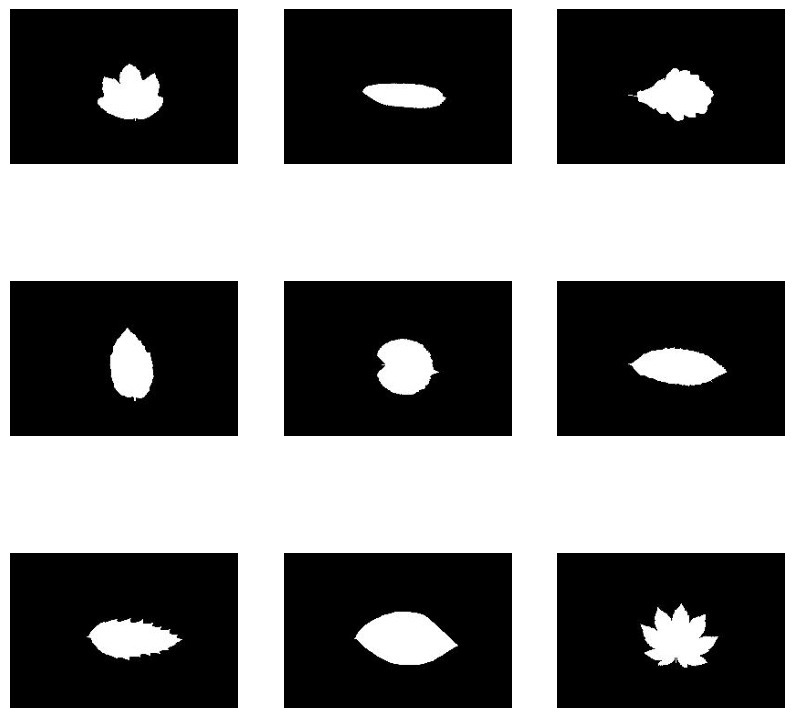

In [56]:
n_images = 1584
X = []

for i in range(n_images):
    new_img = plt.imread('scaled_images/' + str(i + 1) + '.jpg')
    X.append(new_img)

X = np.array(X)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X[i], cmap='gray')
    plt.axis('off')
plt.show()

Сделаем также так, чтобы каждое изображение было представлено не матрицей, а одним вектором из всех пикселей

In [57]:
X = X.reshape(X.shape[0],-1)
assert(X.shape ==(1584, 42500))

3. В файле `train_labels.csv` указаны номера образцов листьев, которые относятся к обучающей части данных, а также их виды.

In [58]:
labels = pd.read_csv('train_labels.csv')
labels.head(10)

,id,species
0,1,Acer_Opalus
1,2,Pterocarya_Stenoptera
2,3,Quercus_Hartwissiana
3,5,Tilia_Tomentosa
4,6,Quercus_Variabilis
5,8,Magnolia_Salicifolia
6,10,Quercus_Canariensis
7,11,Quercus_Rubra
8,14,Quercus_Brantii
9,15,Salix_Fragilis


In [59]:
labels.shape

(990, 2)

Разделите данные на обучающую и тестовую часть.

In [60]:
X_train, y_train = X[labels.id.values - 1], labels.species

Отсортируем теперь по алфавиту названия видов и построим отображение строки в индекс.

In [61]:
species_names = sorted(np.unique(labels.species))
name_to_ind = dict([(name, i) for (i, name) in enumerate(species_names)])
labels.species = labels.species.map(name_to_ind)

4. На обучающей части данных постройте 30 главных компонент. Какую долю дисперсии данных они объясняют? Какую долю дисперсии объясняет каждая компонента отдельно? Постройте график доли объясненной дисперсии (зависимость доли от номера компоненты). Сделайте вывод.

    * **Пояснение**: доля объясненной дисперсии - это показатель, характеризующий какую долю от общей дисперсии в данных объясняет данная компонента. Почитайте в документации метода главных компонент о `explained_variance_ratio_`.*

In [88]:
p = PCA(n_components=30).fit(X_train)
ratio = p.explained_variance_ratio_

Покомпонентное распределение по доле объясненной дисперсии в данных

Общая доля объясненной дисперсии в данных

In [89]:
print(f'{sum(ratio):.2f}')

0.78


<BarContainer object of 30 artists>

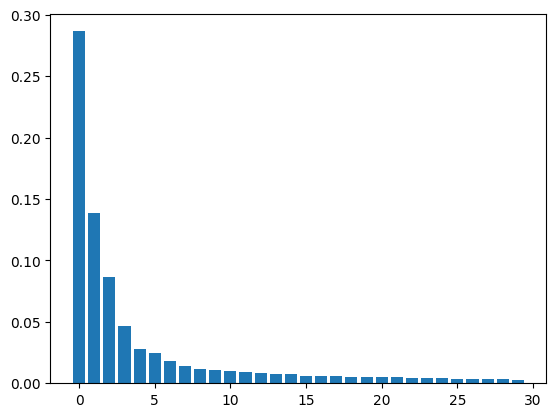

In [90]:
plt.bar(range(30),ratio)

5. Визуализируйте главные компоненты: покажите, какие картинки из себя представляют главные компоненты. Для этого обратно перейдите обратно из представления изображения в виде одного длинного вектора к матрице. Можете ли вы их как-то охарактеризовать?

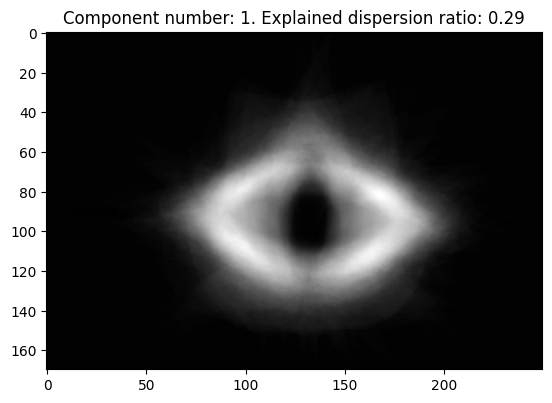

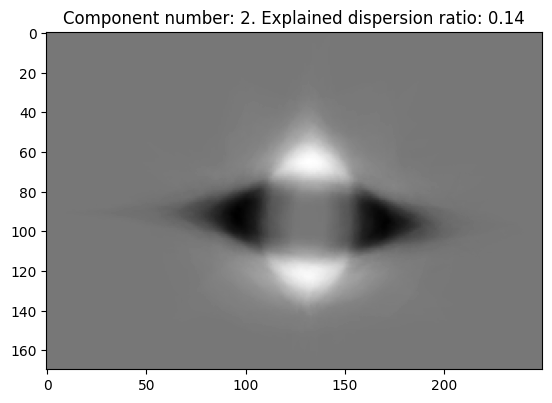

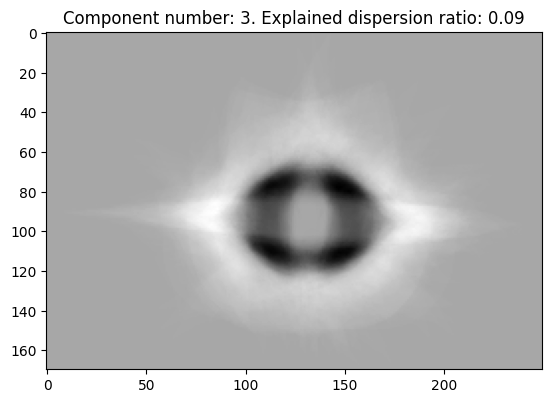

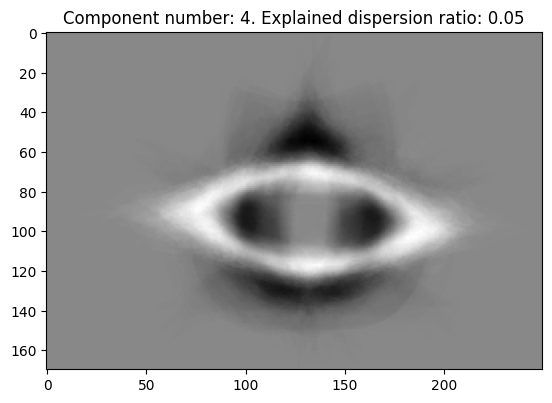

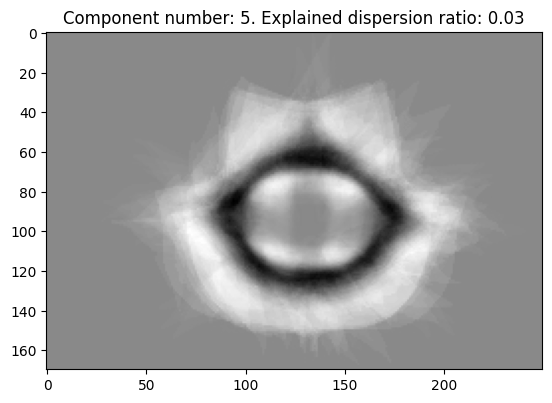

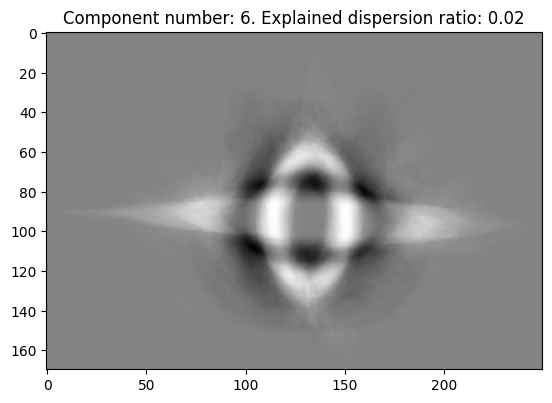

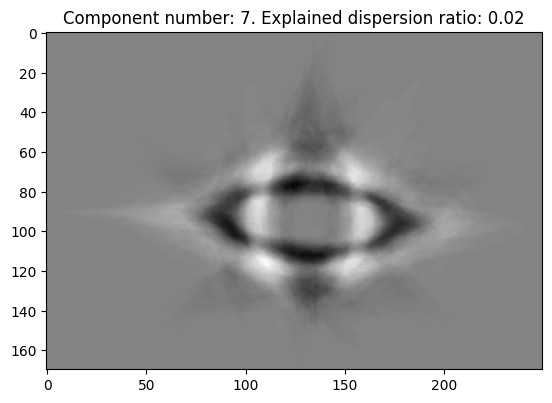

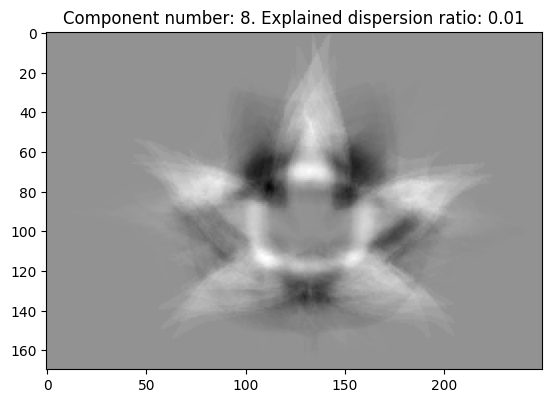

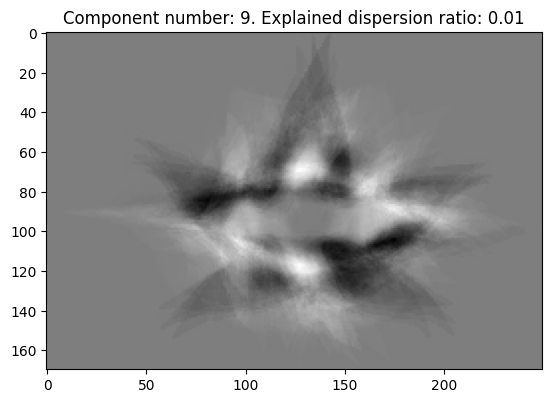

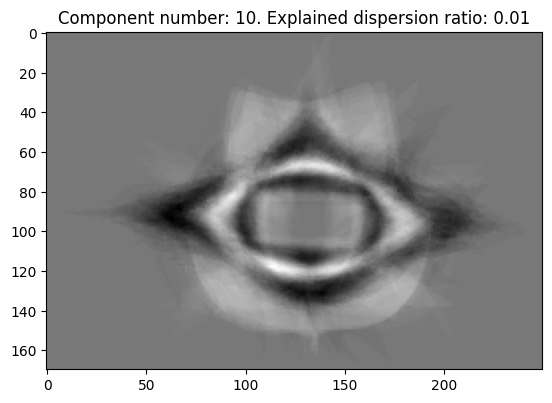

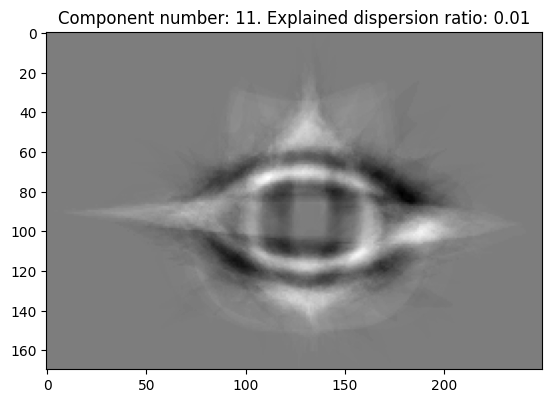

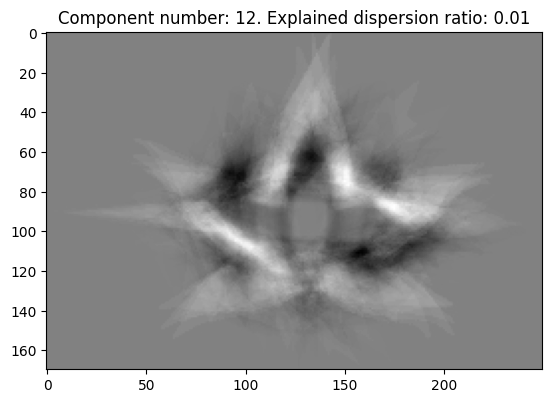

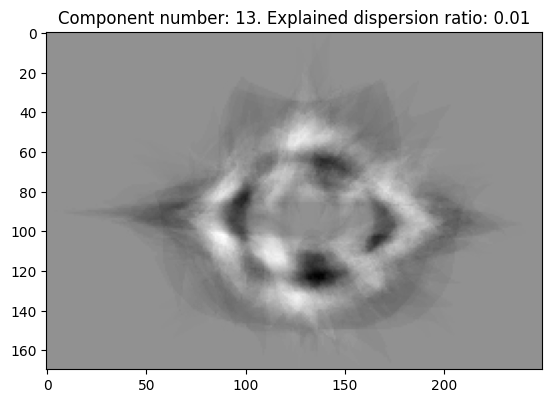

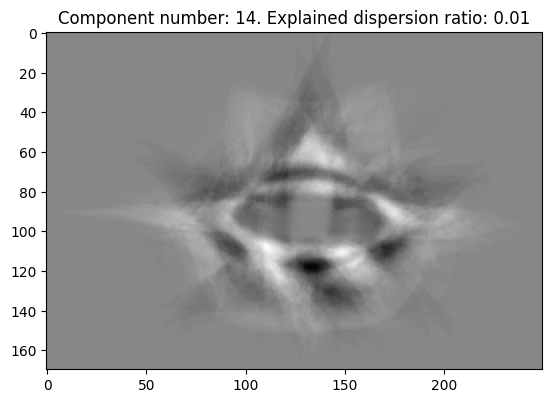

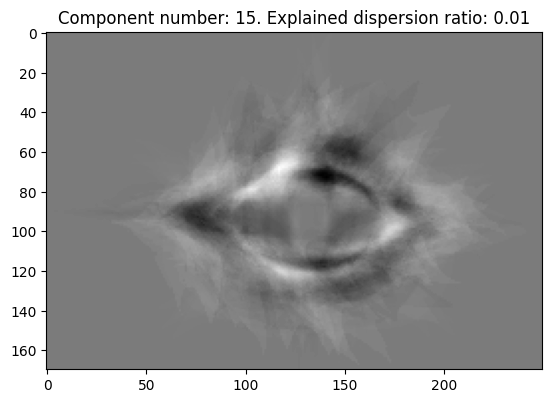

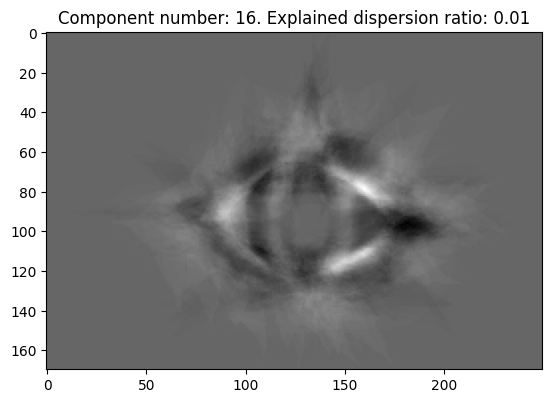

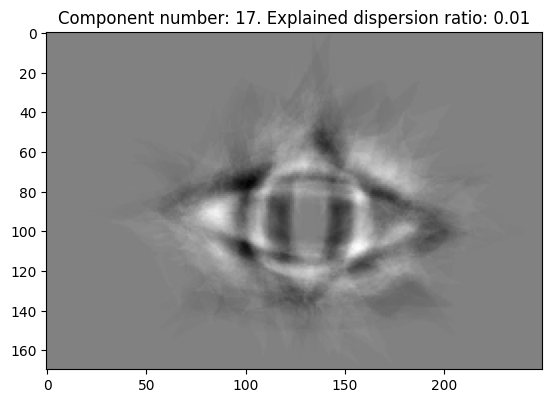

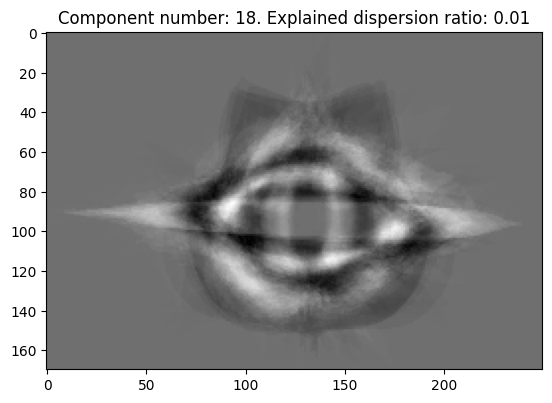

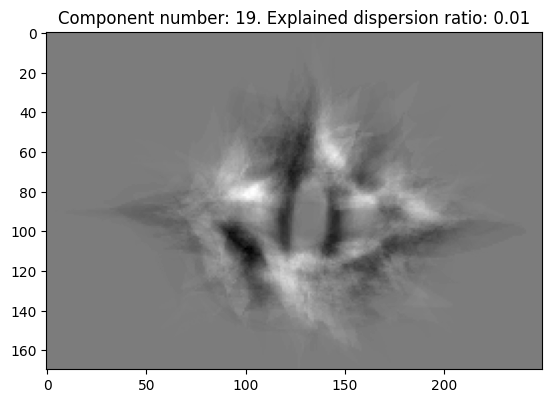

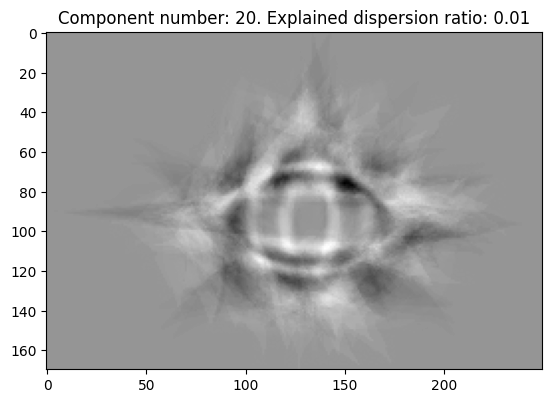

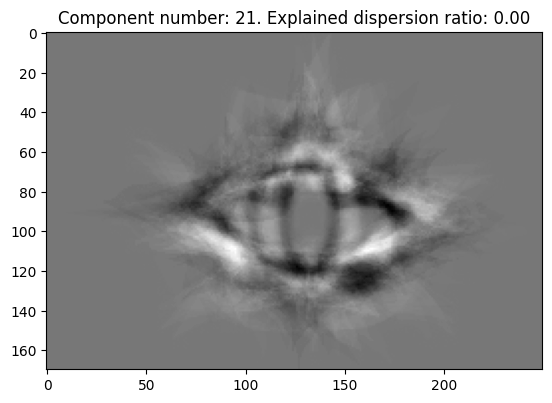

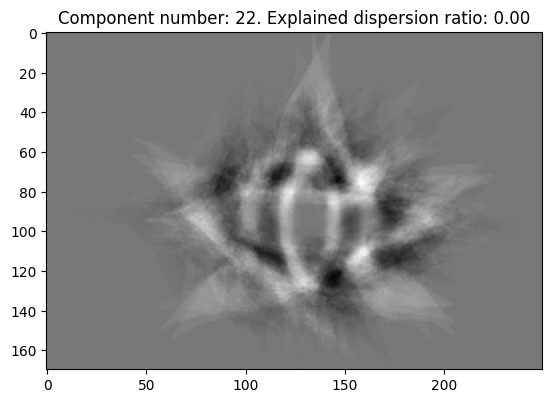

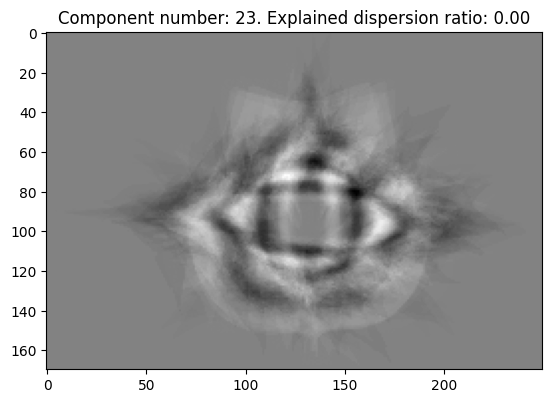

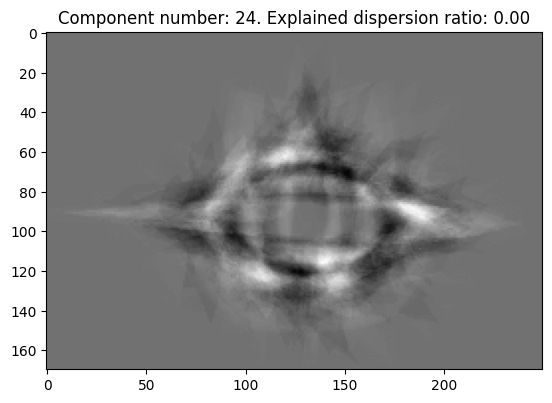

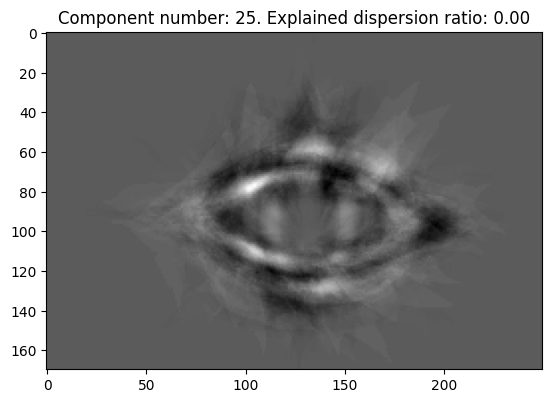

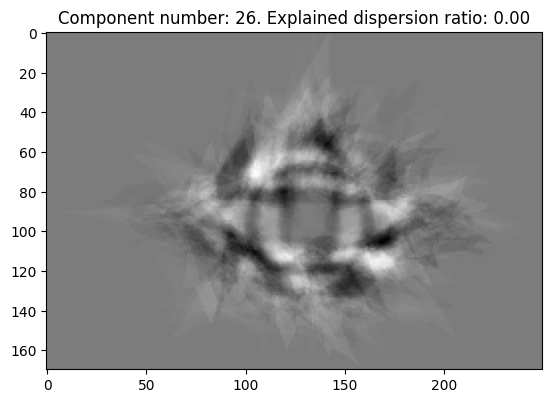

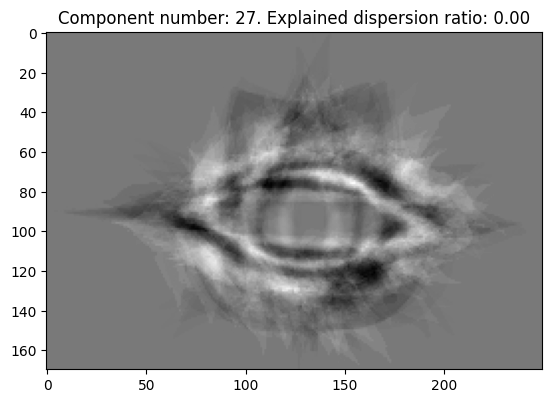

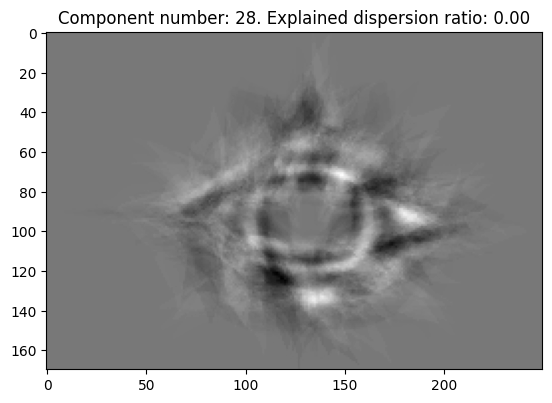

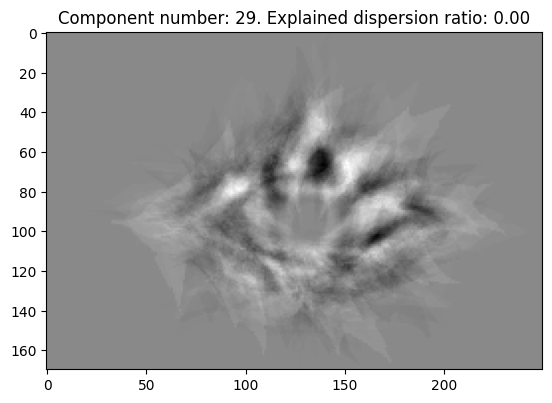

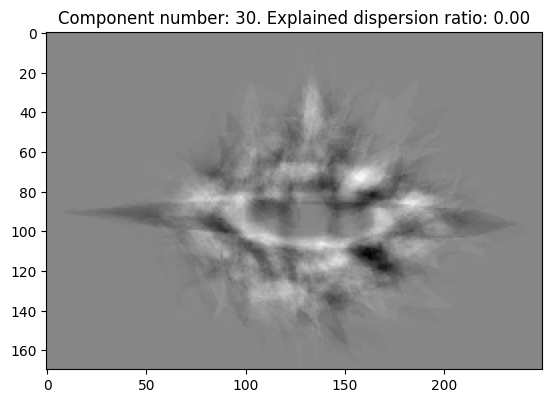

In [65]:
# 170×250
for i, (component,r) in enumerate(zip(p.components_,ratio)):
    plt.imshow(component.reshape(170,250),cmap='gray')
    plt.title(f'Component number: {i+1}. Explained dispersion ratio: {r:.2f}')
    plt.show()

Изображения интерпретируемы, имеют семантически осмысленную форму.

Первым компоненты с наибольшей объясненной дисперсией соотвествует очертания листа, его ориентация в пространстве и его форма. Прочие компоненты имеют шумный силуэт, хуже поддаются интерпретации

6. Визуализируйте обучающую часть данных в проекции на две первых главных компоненты. Цвет точки должен соответствовать виду образца. Используйте `cmap=’Set1’` во избежание градации цвета по номеру вида. Наблюдаются ли какие-либо закономерности?

In [93]:
comp = p.components_[:2].copy()
print(np.linalg.norm(comp,axis=1).shape, comp.shape, X_train.shape)
comp = comp / np.linalg.norm(comp,axis=1)[:,np.newaxis]
projection = X_train @ comp.T
print(projection.shape)

(2,) (2, 42500) (990, 42500)
(990, 2)


Text(0, 0.5, 'Second component projection')

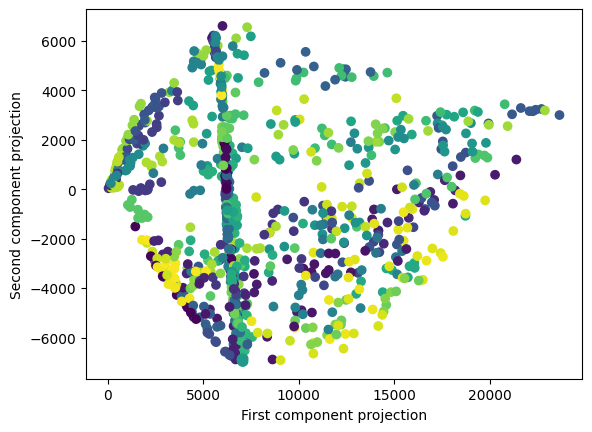

In [104]:
plt.scatter(x=projection[:,0],y=projection[:,1],c=pd.factorize(y_train)[0])
plt.xlabel('First component projection')
plt.ylabel('Second component projection')

Явной линейной разделимости по классам нет

7. По проекциям данных на первые 30 главных компонент обучите многоклассовую классификацию.

    Используйте любую модель классификации, рассмотренную на нашем курсе.

    Разделите данные на тренировочную и валидационную выборки и проверьте качество этой модели по метрике accuracy. Так как метки классов известны только для части данных, используйте только их. Сравните с результатом без применения PCA. Сделайте выводы.

In [112]:
from sklearn.model_selection import train_test_split
X_val, X_test, y_val, y_test = train_test_split(X_train,pd.factorize(y_train)[0])

### Без PCA

In [126]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(n_estimators=50,max_depth=3,verbose=-1)

clf.fit(X_val,y_val).score(X_test,y_test)

0.3185483870967742

### C использованием PCA

In [127]:
p = PCA(n_components=30).fit(X_val)

In [128]:
comp = p.components_[:30].copy()
comp = comp / np.linalg.norm(comp,axis=1)[:,np.newaxis]

In [129]:
import lightgbm as lgb

# задаем проекции на 30 главных компонент
val_projection = X_val @ comp.T
test_projection = X_test @ comp.T

clf.fit(val_projection,y_val).score(test_projection,y_test)

0.4959677419354839

Получили значительный прирост в качетстве

Методы понижения размерности позволяют бороться с переобучением алгоритмов в условиях малой выборки и обширного признакового пространнства

### Задача 2
Проведите свое исследование датасета из `data.txt` на кластеризацию изученными методами, реализованными в sklearn:

- k-means;
- DBSCAN;
- Иерархическая кластеризация.

Для каждого метода выше обоснуйте, почему выбранные вами гиперпараметры оптимальны, исходя из внутренней структуры данных. Если вы не можете применить какой-то из методов на этих данных, то обоснуйте, почему.

*Примечание.* Задача является небольшим упражнением и не предполагает большое исследование.

**Не забываем о предобработке данных!**

In [11]:
data = np.loadtxt('lesson9/data.txt')

In [12]:
data.shape

(100000, 2)

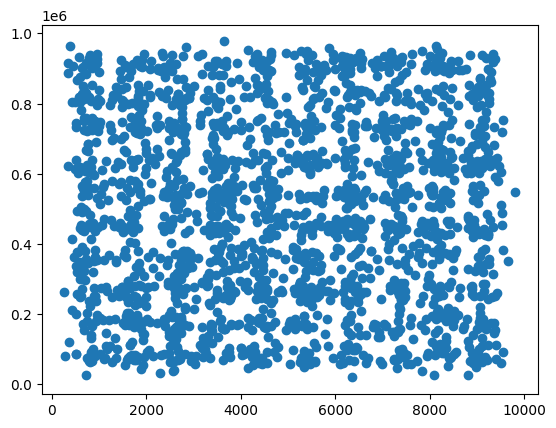

In [46]:
# Визуализация сэмпла

sample = data[np.random.choice(data.shape[0], 2_000)]

plt.scatter(sample[:,0],sample[:,1])

Нормируем

In [49]:
sample = (sample - np.mean(sample,axis=0)) / np.std(sample,axis=0)

Данные распределены вдось осей равномерно  


KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


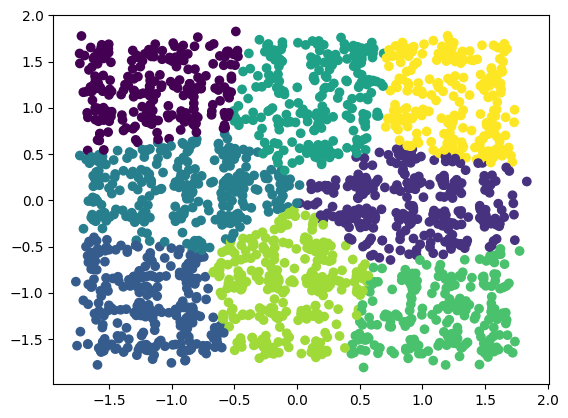

In [50]:
labels = KMeans().fit(sample).predict(sample)
plt.scatter(sample[:,0],sample[:,1],c=labels)

AgglomerativeClustering

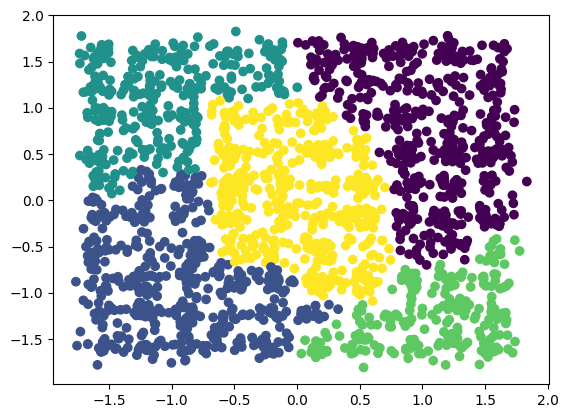

In [51]:
labels = AgglomerativeClustering(5).fit(sample).labels_
plt.scatter(sample[:,0],sample[:,1],c=labels)

DBSCAN

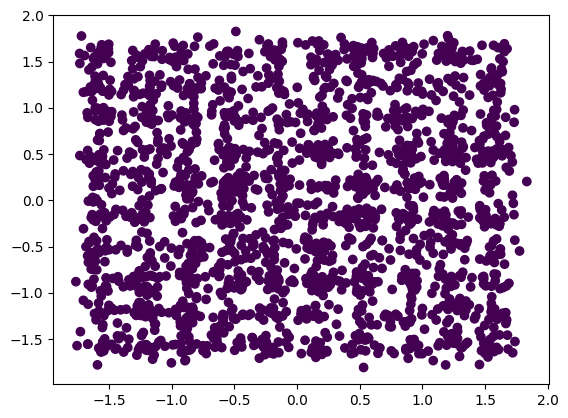

In [52]:
labels = DBSCAN(min_samples=2).fit(sample).labels_
plt.scatter(sample[:,0],sample[:,1],c=labels)